# Random Forest Classifier

## Dependencies and Defaults

In [1]:
import config as cn
import pandas as pd
import numpy as np
import os
from IPython.display import HTML

In [165]:
dir_home = cn.home_dir
dir_clean = cn.clean_dir
dir_processed = cn.processed_dir
dir_raw = cn.raw_dir
f_in = os.path.join(dir_clean,  'trimmed_player_stats_test.csv')

## Clean Player Data

In [168]:
# Load player data
df = pd.read_csv(f_in,dtype='unicode')
df = df.drop_duplicates()
df['id'] = df.player + '_' + df.realm
df = df.set_index('id')
del_cols = [c for c in df.columns.values if 'unnamed' in c.lower()]
df = df.drop(del_cols, axis = 1)
df = df.dropna()

if 'engagement' not in df.columns.values:
    df['engagement'] = np.nan
    for index, row in df.iterrows():
        if int(row.time_since_login.split(' ')[0]) <= 30:
            df.at[index,'engagement'] = 1
        elif int(row.time_since_login.split(' ')[0]) <= 120:
            df.at[index,'engagement'] = 2
        elif int(row.time_since_login.split(' ')[0]) <= 365:
            df.at[index,'engagement'] = 3
        elif int(row.time_since_login.split(' ')[0]) > 365:
            df.at[index,'engagement'] = 4
    #df.to_csv(f_in)
display(HTML(df.head().to_html()))

,10,10010,10011,10012,10013,10016,10017,10018,10019,10020,10023,10024,10025,10026,10027,10030,10032,10033,10034,10035,10036,10037,10038,10039,10040,10041,10042,10043,10044,1005,10052,10053,10054,10057,10058,10059,1006,10061,10069,1007,10070,10071,10073,10074,10075,10076,10079,1008,10080,10081,10082,10083,10084,10085,10086,10087,10088,1009,10090,10092,10094,1010,10101,1011,10112,10113,10121,1014,10148,10149,1015,10154,10155,10156,10159,10160,10161,10162,10163,10164,10165,10166,10168,10169,1017,10170,10177,1020,1021,1025,10253,10255,10258,10259,1026,10260,10261,10262,10265,1027,10275,10276,10307,10309,1031,1032,10320,10321,10322,1033,10334,10335,10337,10348,10349,10353,10354,10355,1036,10365,1037,1039,10398,1041,10411,10412,10413,10456,10457,10458,10459,10460,10461,10537,10542,10543,10544,10553,10554,10555,10561,10575,10580,10581,10582,10583,10585,10586,10587,10588,10589,10591,10592,10593,10594,10595,10596,10597,10598,10599,10600,10601,10602,10603,10604,10605,10606,10607,10608,10609,10610,10611,10617,10626,10627,10657,10663,10665,10666,10667,10668,10669,10671,10672,10678,10679,10680,10681,10682,10684,10685,10686,10687,10688,10689,10690,10691,10692,10693,10694,10696,10697,10698,10699,10704,10706,10707,10709,10710,10711,10722,10741,10742,10745,10746,10747,10748,10750,10751,10753,10754,10755,10756,10761,10762,10763,10764,10765,10766,10769,10770,10771,10772,10773,10774,10775,10776,10778,10780,10781,10782,10783,10784,10785,10786,10788,10789,10790,10793,10795,10796,10797,10798,10799,10800,10801,10802,10803,10804,10805,10806,10807,10808,10809,10813,10816,10817,10818,10819,10820,10821,10822,10823,10824,10825,10826,10827,10829,10830,10837,10838,10839,10840,10842,10843,10844,10845,10846,10847,10848,10849,10850,10851,10852,10853,10875,10876,10877,10991,10992,10993,10994,10995,10996,10997,11,11003,11005,11009,11017,11028,11039,11060,11064,11065,11066,11124,11125,11126,11127,11128,11129,11130,11131,11132,11133,11135,11136,11137,11138,11139,11144,11157,11159,11160,11162,11163,11164,11166,11168,11170,11171,11173,11175,11176,11177,11178,11180,11181,11183,11184,11185,11186,11188,11189,11190,11191,11194,11195,11200,11201,11210,11211,11212,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11223,11232,11233,11240,11256,11257,11258,11259,11260,11261,11262,11263,11264,11265,11277,11279,11282,11284,11294,11296,11297,11298,11320,11335,11337,11338,11340,11377,11386,11387,11394,11395,11396,11397,11398,11425,11426,11427,11429,11430,11431,11432,11433,11446,1145,11468,11469,11470,11471,11472,11474,11475,11476,11477,11478,1153,11543,11544,11545,11546,11559,11561,11564,11566,11567,1157,11570,11572,11573,11578,11579,11580,11581,1159,116,1160,11607,11609,1161,11610,11611,11612,1162,11628,11629,11630,11631,1164,1165,11652,11653,1166,1167,11674,11675,11676,11681,11683,11685,11686,11687,11688,11689,1169,11690,11691,11692,11693,11694,11696,11699,11700,11701,11702,11703,11706,11707,11708,11709,1171,11710,11711,11712,11713,11714,11715,11716,11717,11718,11719,1172,11720,11721,11722,11723,11724,11725,11731,11732,11735,11736,11737,11738,1174,11740,11741,11742,11743,11744,11746,11747,11748,11749,1175,11750,11751,11752,11753,11754,11755,11756,11757,11758,11759,1176,11760,11761,11762,11763,11765,11767,11768,11769,1177,11770,11772,11773,11774,11775,11776,11777,11778,11779,1178,11780,11781,11786,11787,11788,11789,11790,11796,1180,11802,1181,1182,1183,11841,11846,11848,1185,11856,1186,11861,11868,11869,11874,1188,1190,11913,11915,11918,11919,11920,11921,11928,11929,1193,11930,11931,1194,11941,11948,11949,1195,11987,11988,11989,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999,12,12000,12001,12002,12004,12005,12007,12008,12009,12020,12021,12026,12028,1203,12030,12031,12036,12046,1205,1206,12065,12066,12067,12069,12071,12072,12073,12074,12076,12077,12078,12079,12081,12083,12084,12088,12089,12091,12092,12093,12094,12095,12096,12097,12098,12099,121,12100,12101,12102,12103,12104,12108,12109,12110,12129,12135,12136,12169,12170,12180,12181,12182,12183,12187,12199

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 5082 entries, 10 to engagement
dtypes: float64(1), object(5081)
memory usage: 0.0+ bytes


In [128]:
df.describe()

,gear_score,2007-01,2008-01,2009-01,2010-01,2011-01,2012-01,2013-01,2014-01,2015-01,...,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12,2020-12,engagement
count,4987.000000,4987.0,4987.0,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,...,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.0,4987.000000
mean,418.765992,0.0,0.0,5.003409,3.271305,5.831161,2.917987,6.308001,4.684780,9.926810,...,7.776820,4.994987,16.262683,8.290756,8.398235,8.100461,13.625025,11.502105,0.0,1.443152
std,55.484570,0.0,0.0,8.790207,6.213412,9.662120,6.651087,10.956034,9.835005,14.646498,...,11.931333,10.401727,20.183484,13.824036,16.111930,12.742227,14.954462,19.677824,0.0,0.642560
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,396.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,...,1.000000,1.000000,5.000000,2.000000,1.000000,2.000000,5.000000,3.000000,0.0,1.000000
50%,431.000000,0.0,0.0,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,5.000000,...,4.000000,2.000000,11.000000,4.000000,4.000000,4.000000,9.000000,6.000000,0.0,1.000000
75%,460.000000,0.0,0.0,5.000000,4.000000,6.000000,3.000000,7.000000,5.000000,11.000000,...,9.000000,5.000000,20.000000,9.000000,9.000000,9.000000,17.000000,12.000000,0.0,2.000000
max,486.000000,0.0,0.0,125.000000,102.000000,96.000000,158.000000,179.000000,151.000000,268.000000,...,170.000000,258.000000,439.000000,236.000000,296.000000,191.000000,212.000000,541.000000,0.0,3.000000


## Random Forest Classifier with 5 years of data

In [129]:
# Pick only the months we're interested in
months = np.arange(1, 13)
years = [2015 ,2016, 2017, 2018, 2019, 2020]
timepoints = []

for month in months:
    if month < 10:
        month = str(0) + str(month)
    for year in years:
        if year == 2020 and month >= '06':
            break
        if year < 2011 and month != '01':

            continue
        else:
            month = str(month)
            timepoints.append(str(year) + '-' + str(month))
print(sorted(timepoints))

['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05']


In [130]:
df_tree = df.copy()
keep_cols = timepoints.append('engagement')
df_tree = df_tree[timepoints]

df_tree = df_tree.dropna()
df_tree = df_tree.reset_index()
df_tree.describe()
display(HTML(df_tree.head().to_html()))

,id,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2015-02,2016-02,2017-02,2018-02,2019-02,2020-02,2015-03,2016-03,2017-03,2018-03,2019-03,2020-03,2015-04,2016-04,2017-04,2018-04,2019-04,2020-04,2015-05,2016-05,2017-05,2018-05,2019-05,2020-05,2015-06,2016-06,2017-06,2018-06,2019-06,2015-07,2016-07,2017-07,2018-07,2019-07,2015-08,2016-08,2017-08,2018-08,2019-08,2015-09,2016-09,2017-09,2018-09,2019-09,2015-10,2016-10,2017-10,2018-10,2019-10,2015-11,2016-11,2017-11,2018-11,2019-11,2015-12,2016-12,2017-12,2018-12,2019-12,engagement
0,effeta_ragnaros,2.0,7.0,3.0,10.0,18.0,5.0,0.0,8.0,3.0,13.0,7.0,12.0,0.0,2.0,1.0,21.0,7.0,62.0,0.0,1.0,1.0,76.0,5.0,78.0,1.0,2.0,9.0,102.0,8.0,106.0,6.0,3.0,7.0,26.0,10.0,1.0,12.0,8.0,11.0,15.0,1.0,5.0,6.0,20.0,16.0,3.0,3.0,7.0,8.0,13.0,2.0,10.0,7.0,8.0,4.0,4.0,4.0,5.0,8.0,5.0,3.0,2.0,21.0,30.0,12.0,1.0
1,shír_ragnaros,1.0,1.0,1.0,25.0,11.0,11.0,0.0,4.0,1.0,35.0,3.0,4.0,0.0,2.0,0.0,109.0,11.0,17.0,0.0,1.0,51.0,51.0,8.0,10.0,1.0,2.0,39.0,40.0,14.0,22.0,4.0,3.0,19.0,7.0,11.0,1.0,7.0,17.0,10.0,10.0,0.0,2.0,0.0,62.0,13.0,2.0,0.0,6.0,86.0,7.0,0.0,4.0,13.0,29.0,13.0,4.0,3.0,16.0,12.0,11.0,2.0,1.0,22.0,18.0,10.0,1.0
2,razorwind_ragnaros,0.0,7.0,2.0,8.0,9.0,17.0,0.0,5.0,4.0,24.0,3.0,3.0,34.0,2.0,5.0,8.0,7.0,8.0,32.0,4.0,2.0,9.0,5.0,11.0,15.0,15.0,18.0,14.0,6.0,17.0,17.0,18.0,4.0,8.0,8.0,14.0,25.0,6.0,13.0,24.0,24.0,8.0,7.0,52.0,80.0,3.0,10.0,1.0,16.0,35.0,7.0,17.0,3.0,7.0,7.0,9.0,4.0,7.0,11.0,5.0,4.0,4.0,5.0,12.0,28.0,2.0
3,neocivica_ragnaros,0.0,6.0,2.0,7.0,9.0,10.0,0.0,5.0,3.0,8.0,3.0,3.0,32.0,1.0,5.0,5.0,6.0,8.0,28.0,4.0,2.0,8.0,5.0,11.0,14.0,14.0,13.0,13.0,5.0,17.0,17.0,11.0,4.0,8.0,59.0,12.0,14.0,6.0,7.0,99.0,20.0,7.0,6.0,19.0,66.0,3.0,7.0,1.0,8.0,16.0,7.0,11.0,3.0,4.0,6.0,7.0,3.0,6.0,11.0,4.0,2.0,2.0,3.0,6.0,25.0,3.0
4,kaiseos_ragnaros,0.0,3.0,13.0,33.0,24.0,13.0,0.0,2.0,1.0,53.0,7.0,8.0,2.0,1.0,1.0,26.0,11.0,8.0,4.0,3.0,0.0,33.0,38.0,12.0,4.0,7.0,1.0,28.0,23.0,26.0,6.0,8.0,0.0,11.0,20.0,2.0,8.0,0.0,15.0,36.0,9.0,6.0,2.0,15.0,10.0,2.0,1.0,88.0,15.0,13.0,3.0,4.0,89.0,33.0,5.0,4.0,2.0,53.0,11.0,11.0,0.0,101.0,84.0,17.0,25.0,1.0


In [131]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [143]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=10, test_size=.25, random_state=17)
for train_index, test_index in rs.split(df_tree):
    train_set = df_tree.iloc[train_index].copy()
    train_set = train_set.set_index('id')
    test_set = df_tree.iloc[test_index].copy()
    test_set = test_set.set_index('id')

y_train = train_set.engagement
X_train = train_set.drop('engagement',axis = 1)
y_test = test_set.engagement
X_test = test_set.drop('engagement',axis = 1)

print(y_train.head())

id
ragepak_skywall        1.0
xerta_lightbringer     1.0
mythdis_arygos         2.0
karadyndk_kelthuzad    2.0
fyrus_kargath          2.0
Name: engagement, dtype: float64


In [169]:
selected = RandomForestClassifier(n_estimators = 100,n_jobs = -1,
                           oob_score = True,bootstrap = True,random_state = 17)
selected.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=17)

In [154]:
importances = selected.feature_importances_
indices = np.argsort(importances)
important_features = X_train.columns.values[indices]

for i, v in enumerate(important_features[:25]):
    print(i,v)

0 2015-10
1 2016-03
2 2016-02
3 2015-05
4 2016-04
5 2015-08
6 2016-06
7 2016-01
8 2015-04
9 2017-07
10 2015-06
11 2017-02
12 2016-12
13 2015-09
14 2018-04
15 2018-06
16 2015-03
17 2017-10
18 2015-07
19 2017-06
20 2017-12
21 2018-05
22 2019-09
23 2017-08
24 2017-05


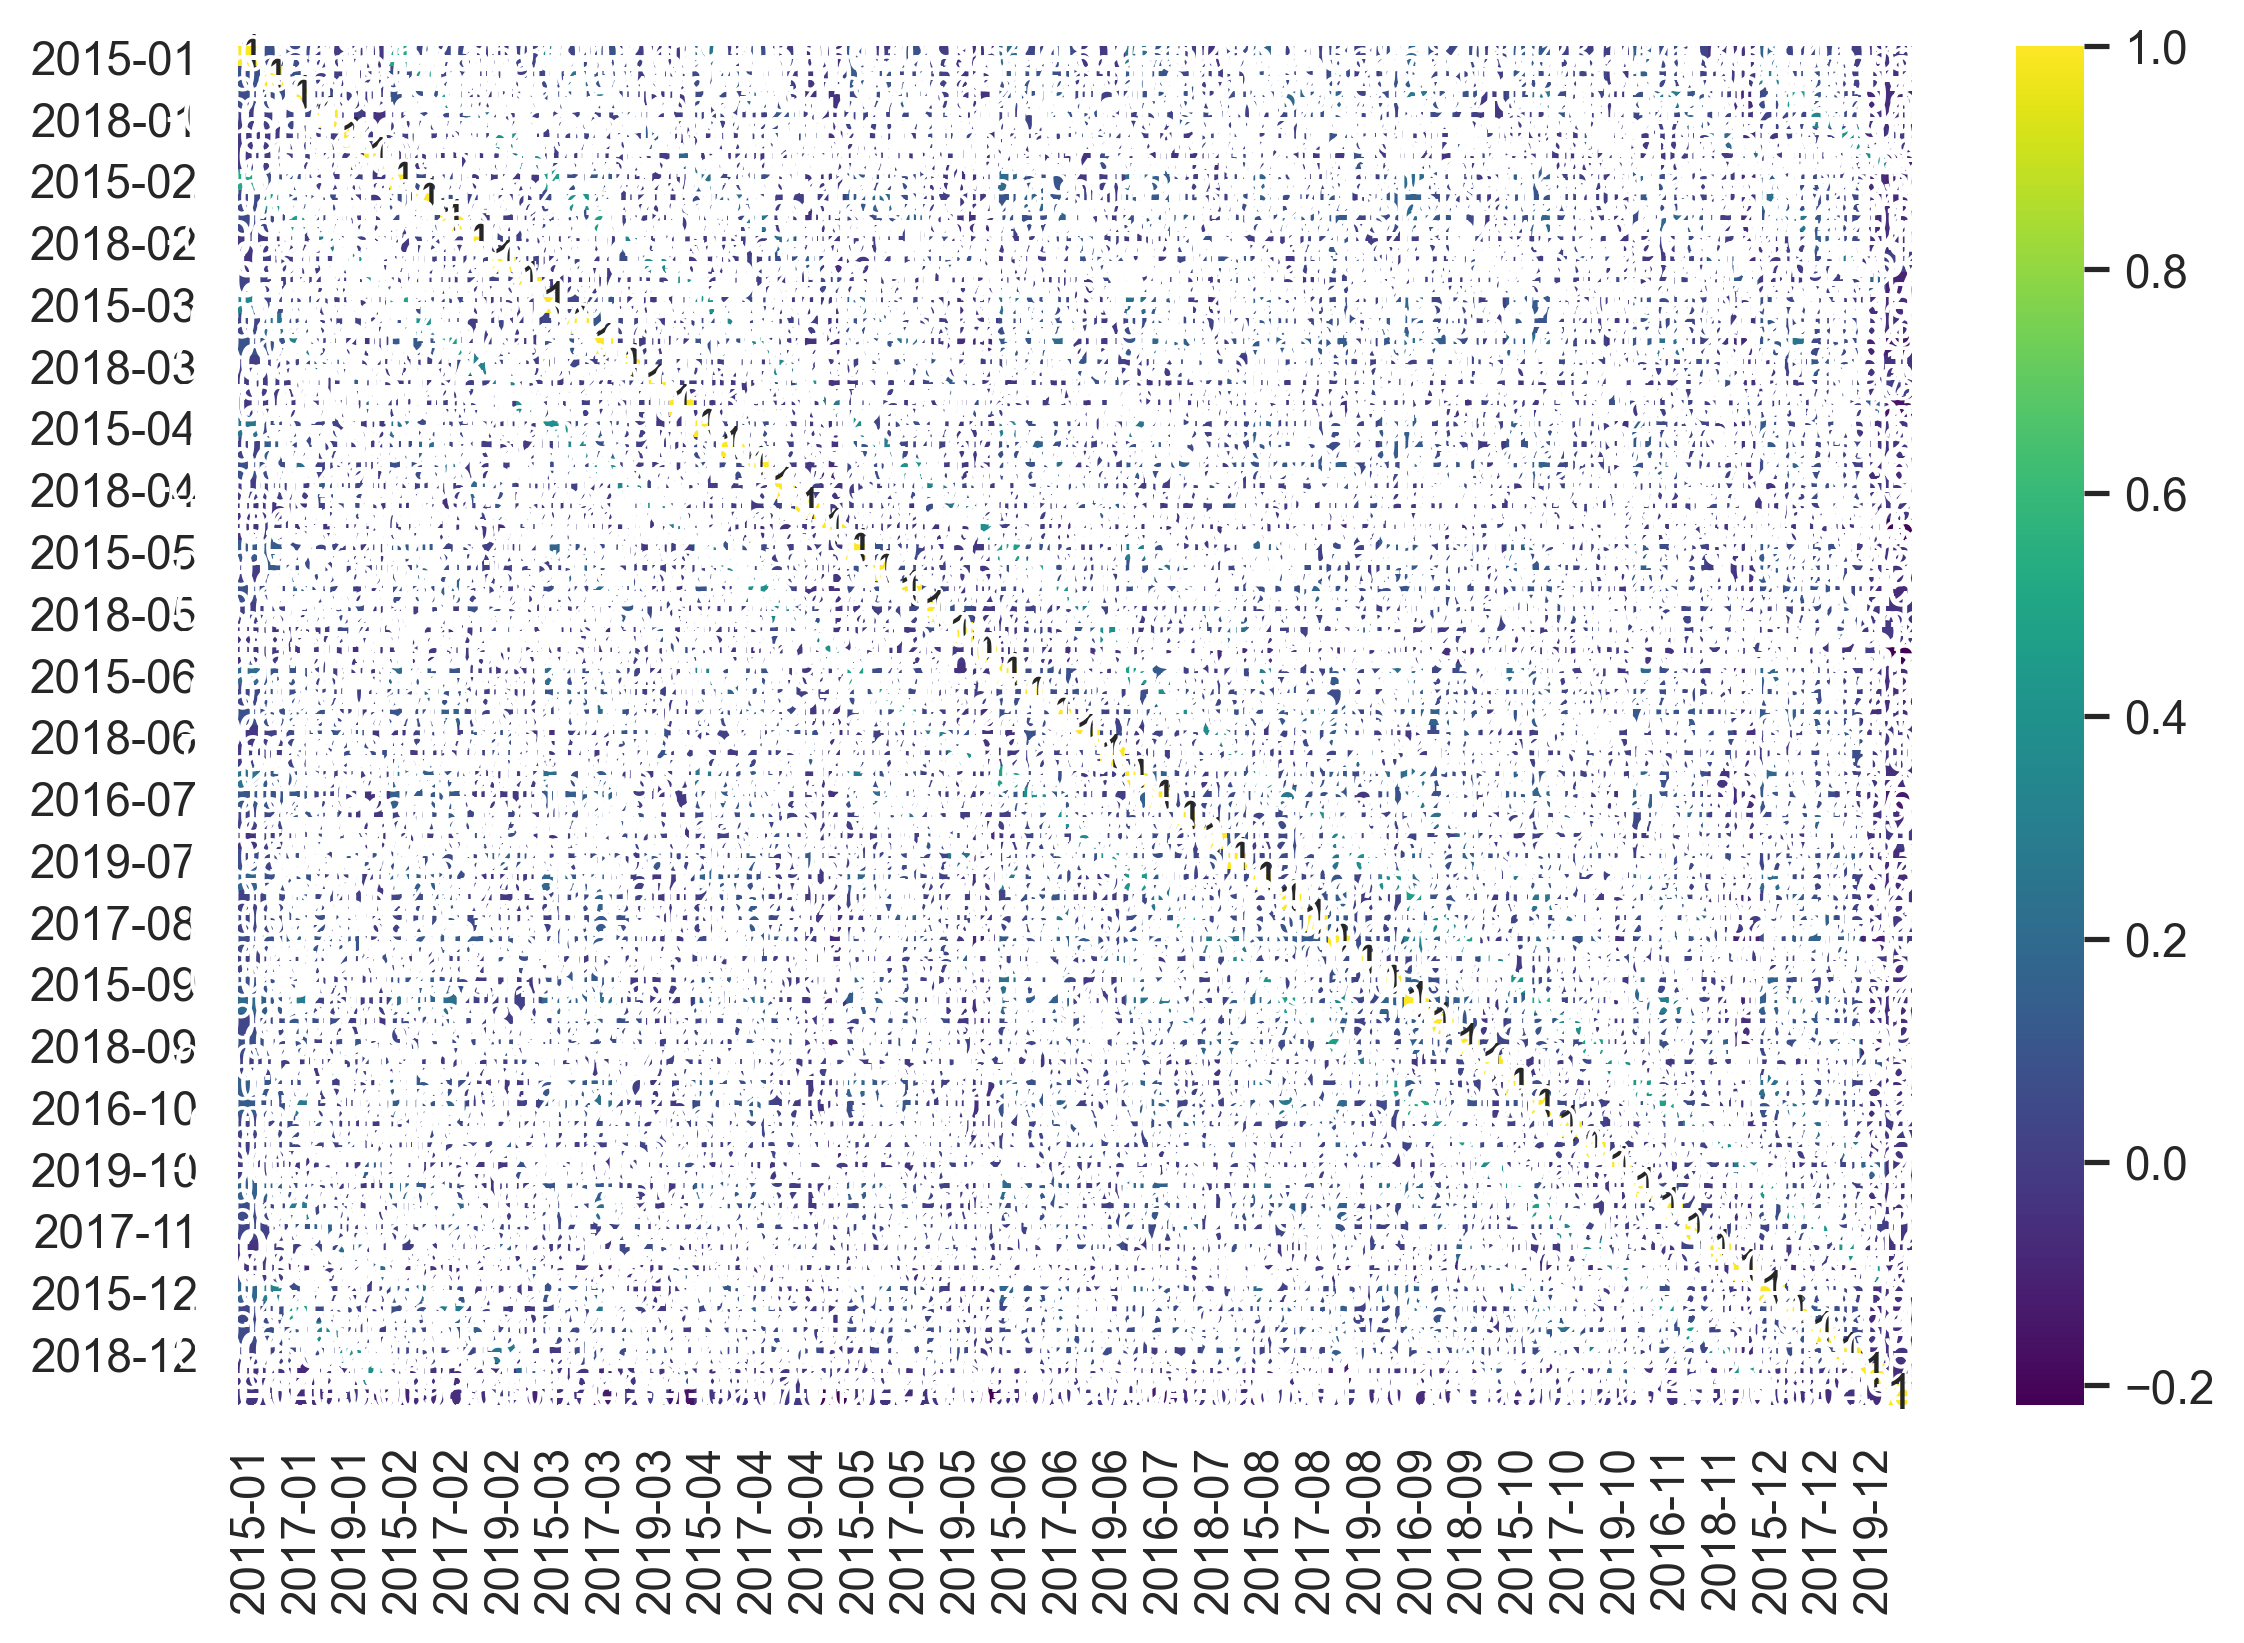

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train_set.corr()
sns.set()
fig, ax = plt.subplots(figsize=(9,6), dpi = 300)
corr_map = sns.heatmap(corr_matrix,  annot = True, ax=ax, cmap = "viridis")

In [156]:
predictions = selected.predict(X_test)

ValueError: Number of features of the model must match the input. Model n_features is 65 and input n_features is 67 

In [ ]:
df_pred = pd.DataFrame(X_test)
df_pred['prediction'] = predictions
df_pred['actual'] = y_test
display(HTML(df_pred.iloc[:100][:].to_html()))

In [157]:
print(selected.score(X_train,y_train))

1.0


In [158]:
print(selected.oob_score_)

0.7181818181818181


In [159]:
print(len(y_test), len(predictions))

1247 1247


In [160]:
from sklearn import metrics

# Print the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,predictions)
print(cnf_matrix)

# Print the precision and recall, among other metrics
metrics = metrics.classification_report(y_test, predictions, digits=3)
print(metrics)

[[770  28   2]
 [217 118   2]
 [ 67  38   5]]
              precision    recall  f1-score   support

         1.0      0.731     0.963     0.831       800
         2.0      0.641     0.350     0.453       337
         3.0      0.556     0.045     0.084       110

    accuracy                          0.716      1247
   macro avg      0.642     0.453     0.456      1247
weighted avg      0.691     0.716     0.663      1247



array([[770,  28,   2],
       [217, 118,   2],
       [ 67,  38,   5]])

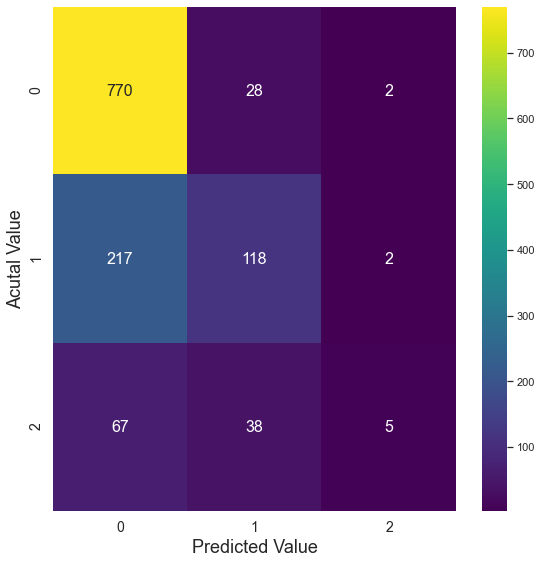

In [161]:
#display (HTML('<br><h2>Confusion Matrix</h2><br>'))
fig3, ax = plt.subplots(figsize = (8,8))
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis', fmt = 'g', annot_kws={"size":16})
ax.set_xlabel ("Predicted Value", fontsize = 18)
ax.set_ylabel ("Acutal Value", fontsize = 18)
ax.tick_params (labelsize = 14)
plt.tight_layout()
cnf_matrix

This is pretty bad for the target audience I'm looking for (2)

## Random Forest with 2 years of data

In [47]:
df_tree = df.copy()

df_tree = df_tree[['2018-06', '2018-07', '2018-08', '2018-09', 
                  '2018-10', '2018-11', '2018-12', '2019-01', 
                  '2019-02', '2019-03', '2019-04', '2019-05', 
                  '2019-06', '2019-07', '2019-08', '2019-09', 
                  '2019-10', '2019-11', '2019-12', '2020-01', 
                  '2020-02', '2020-03', '2020-04', '2020-05',
                  'engagement']]

df_tree = df_tree.dropna()
df_tree = df_tree.reset_index()
df_tree.describe()
display(HTML(df_tree.to_html()))

,id,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,engagement
0,inversion_suramar,4.0,10.0,4,8.0,1.0,2.0,4.0,2.0,2.0,10.0,3.0,2.0,34.0,67.0,18.0,0.0,1.0,4.0,0.0,1,2.0,11,9,8.0,3.0
1,theridan_suramar,2.0,10.0,3,6.0,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0.0,8.0,31.0,2.0,0.0,1.0,18.0,44.0,29,36.0,13,13,9.0,1.0
2,sidechain_suramar,2.0,9.0,7,9.0,4.0,22.0,18.0,9.0,2.0,8.0,7.0,0.0,2.0,25.0,2.0,5.0,1.0,3.0,10.0,6,15.0,8,10,9.0,1.0
3,tonatre_suramar,2.0,9.0,7,12.0,4.0,13.0,12.0,7.0,2.0,6.0,6.0,0.0,2.0,24.0,2.0,5.0,1.0,3.0,10.0,6,15.0,8,10,9.0,3.0
4,hothips_suramar,5.0,6.0,11,51.0,15.0,3.0,5.0,7.0,2.0,3.0,3.0,7.0,5.0,7.0,3.0,6.0,3.0,12.0,16.0,2,10.0,7,10,7.0,1.0
5,playthegame_suramar,1.0,15.0,8,13.0,5.0,9.0,8.0,16.0,4.0,6.0,2.0,0.0,4.0,6.0,1.0,0.0,4.0,14.0,2.0,5,6.0,4,7,3.0,1.0
6,mssilkyskin_suramar,1.0,8.0,8,4.0,3.0,8.0,3.0,16.0,3.0,3.0,5.0,4.0,8.0,6.0,8.0,10.0,27.0,17.0,0.0,3,5.0,6,15,15.0,1.0
7,tau_suramar,0.0,16.0,99,45.0,37.0,13.0,23.0,31.0,7.0,8.0,2.0,3.0,13.0,37.0,8.0,1.0,5.0,12.0,4.0,15,21.0,9,8,3.0,1.0
8,jauer_suramar,0.0,15.0,9,13.0,6.0,10.0,8.0,16.0,4.0,7.0,2.0,1.0,5.0,5.0,1.0,0.0,4.0,9.0,1.0,5,6.0,4,7,3.0,1.0
9,starfighter_suramar,0.0,11.0,9,11.0,6.0,10.0,12.0,15.0,4.0,6.0,2.0,0.0,4.0,3.0,1.0,0.0,3.0,11.0,0.0,4,6.0,4,7,3.0,2.0


In [48]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=10, test_size=.25, random_state=17)
for train_index, test_index in rs.split(df_tree):
    train_set = df_tree.iloc[train_index].copy()
    train_set = train_set.set_index('id')
    test_set = df_tree.iloc[test_index].copy()
    test_set = test_set.set_index('id')

y_train = train_set.engagement
X_train = train_set.drop('engagement',axis = 1)
y_test = test_set.engagement
X_test = test_set.drop('engagement',axis = 1)

print(y_train.head())

id
brückner_kelthuzad        2.0
starfighter_suramar       2.0
loapan_kelthuzad          2.0
demolitionxe_stormrage    2.0
zorj_thrall               1.0
Name: engagement, dtype: float64


In [49]:
selected = RandomForestClassifier(n_estimators = 200,n_jobs = -1,
                           oob_score = True,bootstrap = True,random_state = 17)
selected.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=17)

In [50]:
importances = selected.feature_importances_
indices = np.argsort(importances)
important_features = X_train.columns.values[indices]

for i, v in enumerate(important_features[:25]):
    print(i,v)

0 2019-09
1 2018-06
2 2019-01
3 2019-05
4 2019-12
5 2019-10
6 2019-04
7 2019-08
8 2019-02
9 2020-03
10 2018-11
11 2019-11
12 2019-03
13 2018-07
14 2020-02
15 2018-10
16 2018-12
17 2020-04
18 2018-08
19 2020-01
20 2019-06
21 2018-09
22 2019-07
23 2020-05


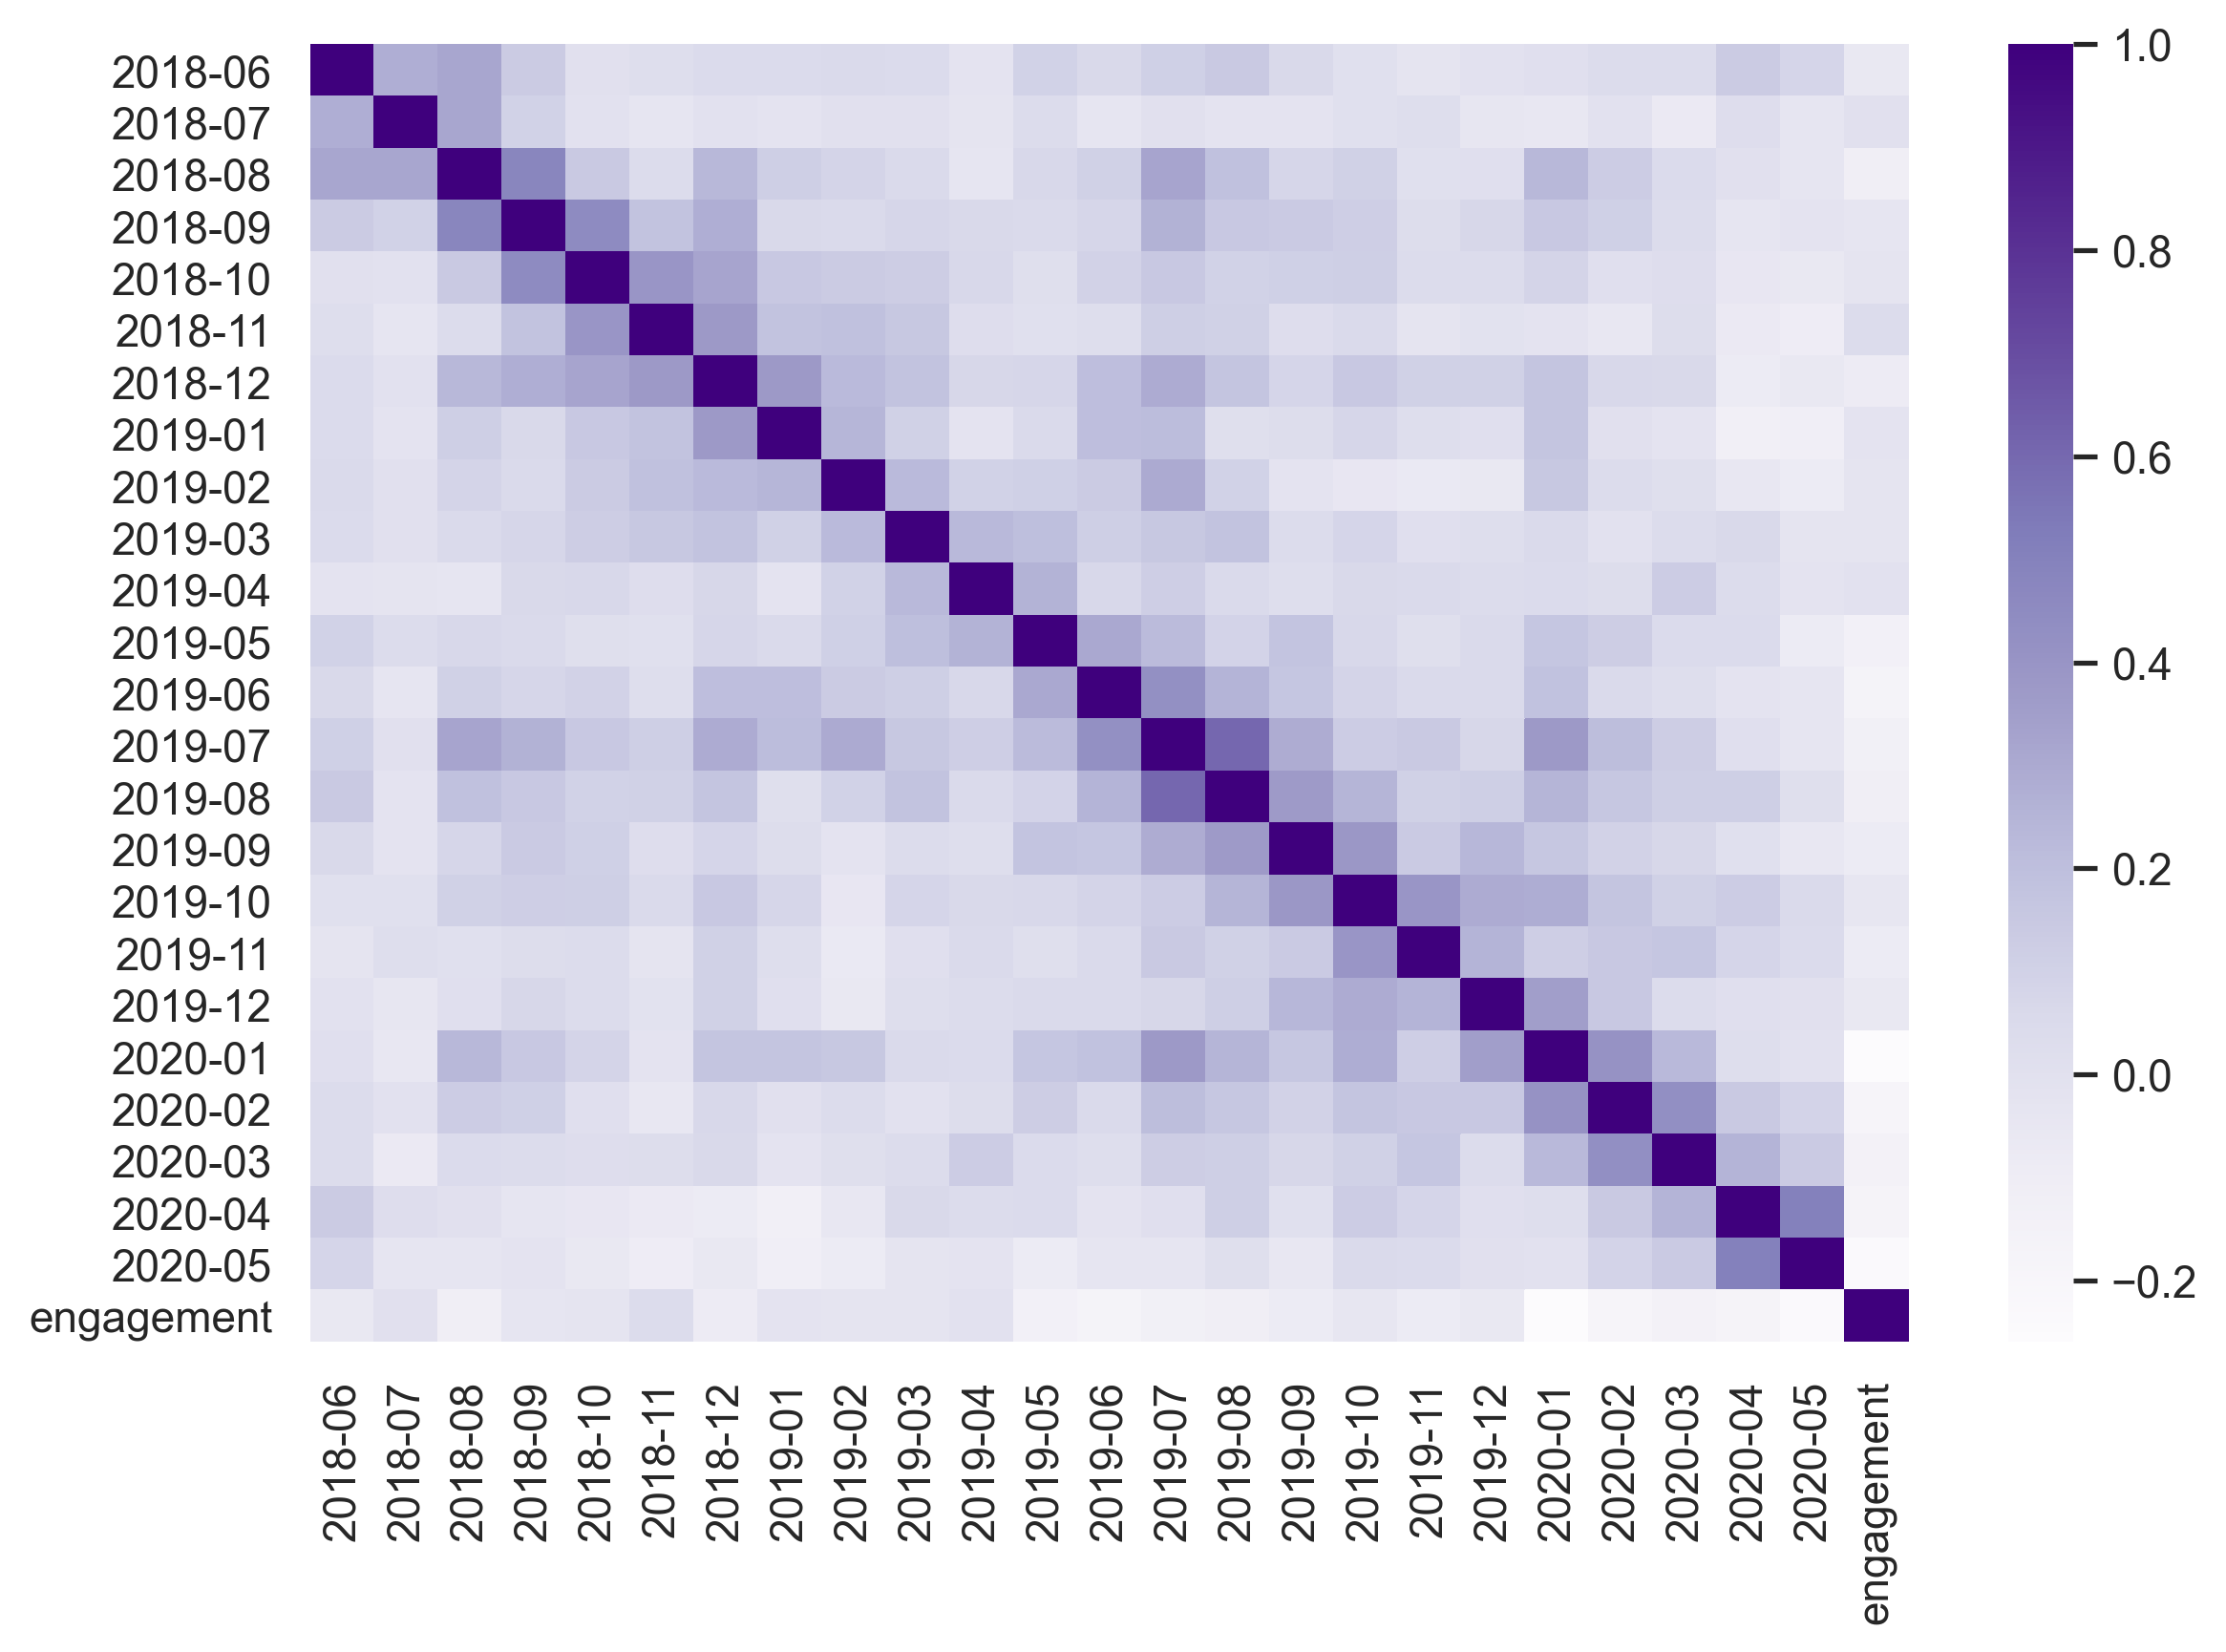

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train_set.corr()
sns.set()
fig, ax = plt.subplots(figsize=(9,6), dpi = 300)
corr_map = sns.heatmap(corr_matrix,  annot = False, ax=ax, cmap = "Purples")

In [52]:
predictions = selected.predict(X_test)

In [53]:
print(selected.score(X_train,y_train))

1.0


In [54]:
print(selected.oob_score_)

0.6929637526652452


In [55]:
from sklearn import metrics

# Print the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,predictions)
print(cnf_matrix)

# Print the precision and recall, among other metrics
metrics = metrics.classification_report(y_test, predictions, digits=3)
print(metrics)

[[90  6  0]
 [27 18  1]
 [ 8  7  0]]
              precision    recall  f1-score   support

         1.0      0.720     0.938     0.814        96
         2.0      0.581     0.391     0.468        46
         3.0      0.000     0.000     0.000        15

    accuracy                          0.688       157
   macro avg      0.434     0.443     0.427       157
weighted avg      0.610     0.688     0.635       157



array([[88,  0,  8],
       [12,  0,  2],
       [16,  0, 31]])

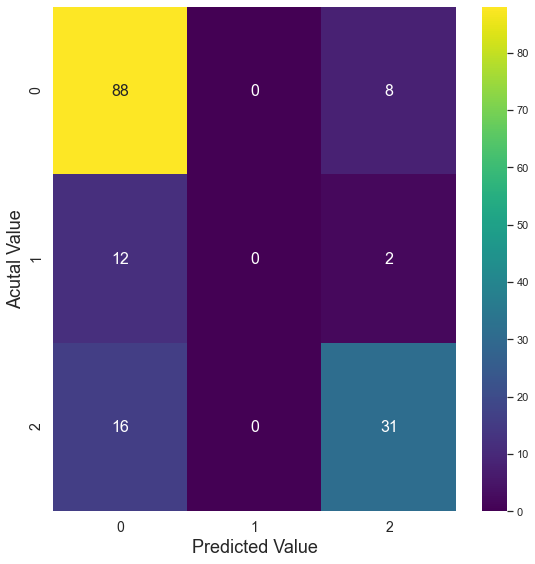

In [42]:
#display (HTML('<br><h2>Confusion Matrix</h2><br>'))
fig3, ax = plt.subplots(figsize = (8,8))
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis', fmt = 'g', annot_kws={"size":16})
ax.set_xlabel ("Predicted Value", fontsize = 18)
ax.set_ylabel ("Acutal Value", fontsize = 18)
ax.tick_params (labelsize = 14)
plt.tight_layout()
cnf_matrix